In [1]:
import pandas as pd

In [2]:
import numpy as np
from scipy import stats, spatial

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
from trackml.dataset import load_event
hits, cells, particles, truth = load_event('data/train_100_events/event000001000')

In [5]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [6]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [7]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [8]:
np.unique(particles.q)

array([-1,  1], dtype=int32)

In [9]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


# Paths?

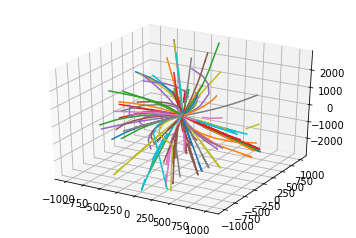

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

particle_ids = np.unique(particles[particles.q == -1].particle_id)[1:100]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    
    ax.plot(particle_hits.x.values, particle_hits.y.values, particle_hits.z.values)
    
plt.show()

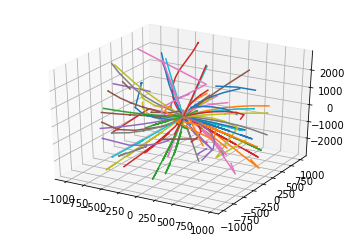

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

particle_ids = np.unique(particles[particles.q == 1].particle_id)[1:100]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    
    ax.plot(particle_hits.x.values, particle_hits.y.values, particle_hits.z.values)
    
plt.show()

# Angles

In [67]:
def angle(u,v):
    costheta = (np.dot(u,v)/np.sqrt(np.dot(u,u)*np.dot(v,v)))
    return(np.arccos(costheta)*180/np.pi)

In [136]:
pos_angles = []
particle_ids = np.unique(particles[particles.q == 1].particle_id)[:500]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    if len(particle_hits >=3):

        diff_hits = particle_hits[['x','y','z']].diff().reset_index()[1:]
        del diff_hits['index']
        diff_hits

        for i in diff_hits.index.values[:-1]:
            u = diff_hits.loc[i]; v = diff_hits.loc[i+1]
            pos_angles.append(angle(u,v))
pos_angles = np.array(pos_angles)

(array([ 1958.,    98.,    17.,     9.,    11.,    11.,    10.,    22.,
           53.,   927.]),
 array([   0.        ,   17.99802111,   35.99604222,   53.99406334,
          71.99208445,   89.99010556,  107.98812667,  125.98614778,
         143.9841689 ,  161.98219001,  179.98021112]),
 <a list of 10 Patch objects>)

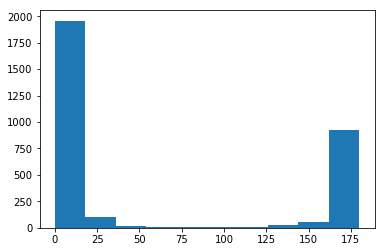

In [137]:
plt.hist(pos_angles[~np.isnan(pos_angles)])

/home/hudson/anaconda3/envs/math189/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/hudson/anaconda3/envs/math189/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(array([ 353.,  139.,   75.,   65.,   57.,   50.,   56.,   77.,  114.,  274.]),
 array([  30.04476248,   42.03104062,   54.01731876,   66.00359691,
          77.98987505,   89.97615319,  101.96243133,  113.94870948,
         125.93498762,  137.92126576,  149.9075439 ]),
 <a list of 10 Patch objects>)

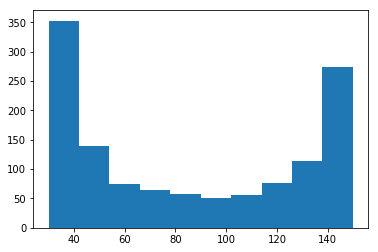

In [86]:
plt.hist(pos_angles[(~np.isnan(pos_angles)) & (pos_angles > 30) & (pos_angles < 150)])

In [80]:
neg_angles = []
particle_ids = np.unique(particles[particles.q == -1].particle_id)
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    if len(particle_hits >=3):

        diff_hits = particle_hits[['x','y','z']].diff().reset_index()[1:]
        del diff_hits['index']
        diff_hits

        for i in diff_hits.index.values[:-1]:
            u = diff_hits.loc[i]; v = diff_hits.loc[i+1]
            neg_angles.append(angle(u,v))
neg_angles = np.array(neg_angles)

/home/hudson/anaconda3/envs/math189/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 26659.,    991.,    165.,     86.,     70.,     32.,     42.,
            87.,    261.,  10311.]),
 array([   0.        ,   18.0000005 ,   36.000001  ,   54.0000015 ,
          72.000002  ,   90.0000025 ,  108.00000301,  126.00000351,
         144.00000401,  162.00000451,  180.00000501]),
 <a list of 10 Patch objects>)

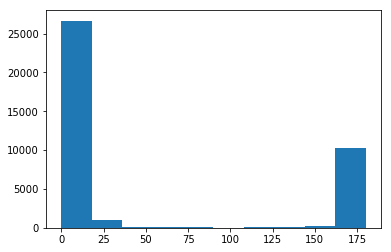

In [81]:
plt.hist(neg_angles[~np.isnan(neg_angles)])

# First Angle vs Initial Momentum?

In [138]:
pos_angles = []
particle_ids = np.unique(particles[particles.q == 1].particle_id)[:500]
for particle_id in particle_ids:
    hit_ids = truth[truth.particle_id == particle_id]['hit_id']
    particle_hits = hits.loc[hit_ids-1]
    diff_hits = particle_hits[['x','y','z']].diff().reset_index()[1:]
    del diff_hits['index']
    if len(diff_hits) >=2:
        u = diff_hits.iloc[0]; v = diff_hits.iloc[1]
        a = angle(u,v)
        momenta = particles[particles.particle_id == particle_id][['px','py','pz']].values[0]
        momentum = np.sqrt(np.dot(momenta, momenta))
        pos_angles.append([a, momentum])
pos_angles = np.array(pos_angles)

In [97]:
pos_angles

array([[   0.563365  ,    2.27178812],
       [   1.18382514,    1.22783387],
       [   0.20558423,   45.80442047],
       ..., 
       [   1.27380008,    1.00259411],
       [ 163.26922441,    0.30069715],
       [   0.55320071,    1.34718347]])

## No relationship between momentum and first angle

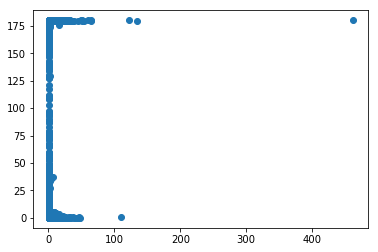

In [99]:
plt.scatter(pos_angles[:,1], pos_angles[:,0])

# Angle of incidence vs angle of reflection?

In [160]:
detectors = pd.read_csv('data/detectors.csv')
detectors.head()

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


In [149]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [186]:
angles = []
particle_ids = np.unique(particles[particles.q == 1].particle_id)[:1]
# for particle_id in particle_ids:
paricle_id = particle_ids[0]
hit_ids = truth[truth.particle_id == particle_id]['hit_id']
# if len(hit_ids) >=3:
hit_1 = hit_ids.iloc[0]
hit_2 = hit_ids.iloc[1]
hit_3 = hit_ids.iloc[2]

vec_in = hits.loc[hit_2-1][['x','y','z']] - hits.loc[hit_1-1][['x','y','z']]
vec_out = hits.loc[hit_3-1][['x','y','z']] - hits.loc[hit_2-1][['x','y','z']]

detector_id = hits.loc[hit_2-1][['volume_id','layer_id','module_id']].values
detector = detectors[(detectors['volume_id'] == detector_id[0]) & (detectors['layer_id'] == detector_id[1]) & (detectors['module_id'] == detector_id[2])]

rotation_mat = detector[['rot_xu', 'rot_xv','rot_xw', 'rot_yu', 'rot_yv','rot_yw', 'rot_zu', 'rot_zv','rot_zw']]
print(rotation_mat)
rotation_mat = rotation_mat.values.reshape(3,3)
print(rotation_mat)

        rot_xu  rot_xv    rot_xw    rot_yu  rot_yv    rot_yw  rot_zu  rot_zv  \
1265 -0.343719     0.0 -0.939073 -0.939073     0.0  0.343719       0       1   

      rot_zw  
1265       0  
[[-0.343719  0.       -0.939073]
 [-0.939073  0.        0.343719]
 [ 0.        1.        0.      ]]


In [162]:
detector_id

NameError: name 'detector_id' is not defined